# Libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from ipywidgets import interact

import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting toolkit

In [2]:
pip install wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.


# Read CSV

In [3]:
current_directory = os.getcwd()
print(current_directory)

/Users/danielreyes/Documents/Projetos/Evora Universisty/inception-entity-parser/src/exploratory-data-analysis


In [4]:
if not os.path.exists('exported_figures'):
    os.mkdir('exported_figures')

# Specify the folder path and file name
folder_path = "../data/ParsedData/"
# file_name = 'freguesias_aggregated_15_08_2023_10_27_parsed.csv'
file_name = 'freguesias_aggregated_17_10_2023_11_56_parsed.csv'

# Combine the folder path and file name to create the complete file path
file_path = folder_path + file_name
print(file_path)

# Specify the delimiter used in your CSV file (e.g., ',' for comma-separated, ';' for semicolon-separated, '\t' for tab-separated)
delimiter = ';'

../data/ParsedData/freguesias_aggregated_17_10_2023_11_56_parsed.csv


In [5]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path, delimiter=delimiter)

# Statistical informations

In [6]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4947 entries, 0 to 4946
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   file_name        4947 non-null   object
 1   entity           4947 non-null   object
 2   category_entity  4947 non-null   object
 3   entity_cardinal  4947 non-null   int64 
 4   ent_concat       4947 non-null   object
 5   text_concat      4947 non-null   object
dtypes: int64(1), object(5)
memory usage: 232.0+ KB
None


In [7]:
# Display the first few rows of the dataset
print("\nFirst 5 Rows:")
df.head()


First 5 Rows:


,file_name,entity,category_entity,entity_cardinal,ent_concat,text_concat
0,Beja_Albernoa.modernizada,*,PLC\_LOC,1,Albernoa,"#Text=Albernoa, 1758\r#Text=Memória Paroquial ..."
1,Beja_Albernoa.modernizada,*,PLC\_AQU,4,Louriçais,"#Text=O vasto, e inculto terreno desta paróqui..."
2,Beja_Albernoa.modernizada,*,PLC\_AQU,5,Cobres,"#Text=O vasto, e inculto terreno desta paróqui..."
3,Beja_Albernoa.modernizada,*,PLC\_AQU,6,Terges,"#Text=O vasto, e inculto terreno desta paróqui..."
4,Beja_Albernoa.modernizada,*[1],PLC\_LOC[1],1,Albernoa é aldeia do termo da cidade = Beja,"#Text=Albernoa, 1758\r#Text=Memória Paroquial ..."


# Transformations
- Dropping some columns and creation other new columns

In [8]:
COLUMNS_TO_DROP = ['entity', 'entity_cardinal']
df.drop(columns=COLUMNS_TO_DROP, inplace=True)

In [9]:
# Display the first few rows of the dataset after to drop columns
print("\nFirst 5 Rows:")
df.head()


First 5 Rows:


,file_name,category_entity,ent_concat,text_concat
0,Beja_Albernoa.modernizada,PLC\_LOC,Albernoa,"#Text=Albernoa, 1758\r#Text=Memória Paroquial ..."
1,Beja_Albernoa.modernizada,PLC\_AQU,Louriçais,"#Text=O vasto, e inculto terreno desta paróqui..."
2,Beja_Albernoa.modernizada,PLC\_AQU,Cobres,"#Text=O vasto, e inculto terreno desta paróqui..."
3,Beja_Albernoa.modernizada,PLC\_AQU,Terges,"#Text=O vasto, e inculto terreno desta paróqui..."
4,Beja_Albernoa.modernizada,PLC\_LOC[1],Albernoa é aldeia do termo da cidade = Beja,"#Text=Albernoa, 1758\r#Text=Memória Paroquial ..."


In [10]:
# Removing the cardinals and slash from the category_entity column
# PLC\_LOC[1] -> PLC_LOC
df['category_entity'] = df['category_entity'].str.replace(r'\[.*\]', '', regex=True).str.replace('\\','')

/var/folders/1h/hh3lj8zd0t1gvzdf3pmnc59r0000gn/T/ipykernel_42074/3869459892.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['category_entity'] = df['category_entity'].str.replace(r'\[.*\]', '', regex=True).str.replace('\\','')


In [11]:
# Creating two new columns ['city', 'freguesia'] from file name value
df['city'] = df['file_name'].str.split('_').str[0] 
df['city'] = df['city'].str.replace('.modernizada', '').str.replace('.revista', '').str.replace('.revista.normalisada', '').str.replace('.NossaSenhoraDasCiladas.normalisada', '').str.replace('.normalisada', '')

df['freguesia'] = df['file_name'].str.split('_', 1).str[1]
df['freguesia'] = df['freguesia'].str.replace('.modernizada', '').str.replace('.revista', '').str.replace('.revista.normalisada', '')

/var/folders/1h/hh3lj8zd0t1gvzdf3pmnc59r0000gn/T/ipykernel_42074/1696458595.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['city'] = df['city'].str.replace('.modernizada', '').str.replace('.revista', '').str.replace('.revista.normalisada', '').str.replace('.NossaSenhoraDasCiladas.normalisada', '').str.replace('.normalisada', '')
/var/folders/1h/hh3lj8zd0t1gvzdf3pmnc59r0000gn/T/ipykernel_42074/1696458595.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['freguesia'] = df['freguesia'].str.replace('.modernizada', '').str.replace('.revista', '').str.replace('.revista.normalisada', '')


In [12]:
# Transforming the values to small case to remove difference between upper and lower case
# Albernoa -> albernoa | albernoa -> albernoa
df['ent_concat'] = df['ent_concat'].str.lower()

In [13]:
# Display the first few rows of the dataset
print("\nFirst 5 Rows:")
df.head()


First 5 Rows:


,file_name,category_entity,ent_concat,text_concat,city,freguesia
0,Beja_Albernoa.modernizada,PLC_LOC,albernoa,"#Text=Albernoa, 1758\r#Text=Memória Paroquial ...",Beja,Albernoa
1,Beja_Albernoa.modernizada,PLC_AQU,louriçais,"#Text=O vasto, e inculto terreno desta paróqui...",Beja,Albernoa
2,Beja_Albernoa.modernizada,PLC_AQU,cobres,"#Text=O vasto, e inculto terreno desta paróqui...",Beja,Albernoa
3,Beja_Albernoa.modernizada,PLC_AQU,terges,"#Text=O vasto, e inculto terreno desta paróqui...",Beja,Albernoa
4,Beja_Albernoa.modernizada,PLC_LOC,albernoa é aldeia do termo da cidade = beja,"#Text=Albernoa, 1758\r#Text=Memória Paroquial ...",Beja,Albernoa


In [14]:
# Summary statistics for numeric columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                           file_name category_entity       ent_concat  \
count                           4947            4947             4947   
unique                            69              16             2756   
top     Evora_Se.modernizada.revista         PLC_GPE  cidade de évora   
freq                             439            1067               70   

                                              text_concat  city freguesia  
count                                                4947  4947      4822  
unique                                               1328     4        68  
top     #Text=Vidigueira, 1758\r#Text=Memória Paroquia...  Beja        Se  
freq                                                   73  1836       439  


In [15]:
df.city.unique()

array(['Beja', 'Evora', 'Portalegre', 'VilaVicosa'], dtype=object)

# Word Cloud
- Using the entities to build a word cloud

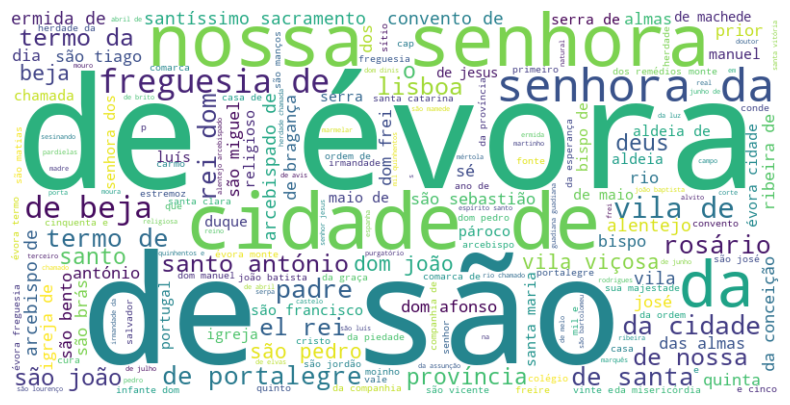

In [16]:
text = ' '.join(df['ent_concat'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
file_name = f'exported_figures/figure_word_cloud.png'
plt.savefig(file_name)
plt.show()

# plt.close()  # Close the figure

# Data Vis

In [17]:
sns.set(style='whitegrid')

# Count of unique values in each column
print("\nUnique Value Counts:")
for column in df.columns:
    unique_count = df[column].nunique()
    print(f"{column}: {unique_count} unique values")


Unique Value Counts:
file_name: 69 unique values
category_entity: 16 unique values
ent_concat: 2756 unique values
text_concat: 1328 unique values
city: 4 unique values
freguesia: 68 unique values


In [18]:
cities = df['city'].unique()

## Top Entidades Nomeadas encontradas entre TODAS freguesias

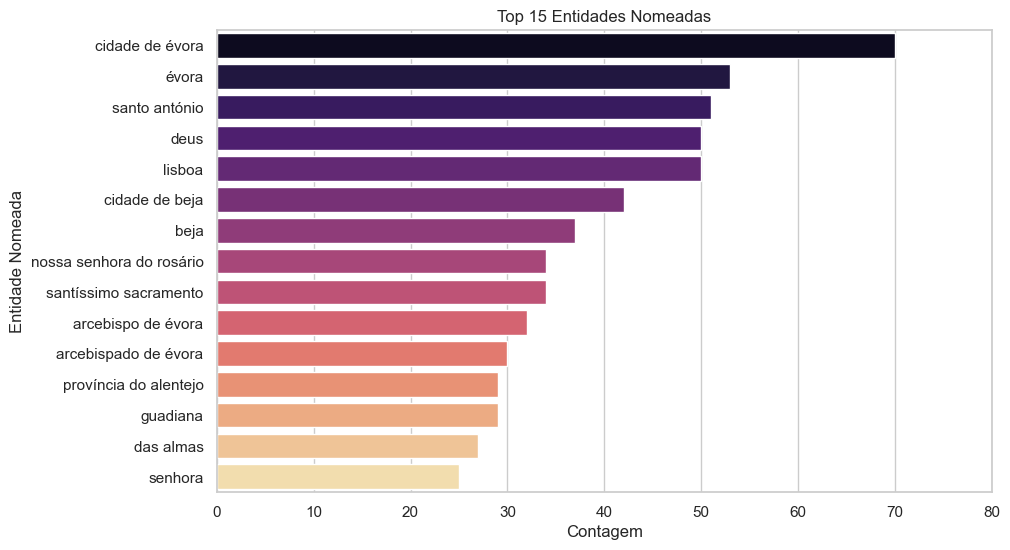

In [19]:
# Distribution of the main (top 15) entities nominated among all freguesias
top_entities = df['ent_concat'].value_counts().head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_entities.values, y=top_entities.index, orient='h', palette='magma')
plt.title('Top 15 Entidades Nomeadas')
plt.xlabel('Contagem')
intervalo_x_ticks = np.arange(0, top_entities.max() + 11, 10)  # Intervalo de 10 em 10
plt.xticks(intervalo_x_ticks)
plt.xlim(0, top_entities.max() + 10)
plt.ylabel('Entidade Nomeada')
file_name = f'exported_figures/figure_top_15_entidades_nomeadas.png'
plt.savefig(file_name)
# plt.close()  # Close the figure
plt.show()

## Ocorrência das top entidades entre as freguesias

In [20]:
df_filtered_top_entities = df[df['ent_concat'].isin(top_entities.index)]
df_filtered_top_entities.head(5)

occurrences_top_entities_city = df_filtered_top_entities.groupby(['city', 'ent_concat']).size().unstack(fill_value=0)

def plot_occurrences_top_entities_city(city):
    top_entidades_city = occurrences_top_entities_city.loc[city].nlargest(15)
    plt.figure(figsize=(10, 6))
    intervalo_x_ticks = np.arange(0, occurrences_top_entities_city.max().max() + 5, 10)  # Intervalo de 10 em 10
    plt.xticks(intervalo_x_ticks)
    plt.xlim(0, occurrences_top_entities_city.max().max() + 5)
    ax = sns.barplot(x=top_entidades_city.values, y=top_entidades_city.index, orient='h', palette='magma')
    ax.set(xlabel='Frequência', ylabel='Entidades', title=f'Ocorrencia das top Entidades em {city}')
    file_name = f'exported_figures/figure_occurrences_top_entities_in_{city}.png'
    plt.savefig(file_name)
    # plt.close()  # Close the figure
    plt.show()
    
interact(plot_occurrences_top_entities_city, city=cities)

interactive(children=(Dropdown(description='city', options=('Beja', 'Evora', 'Portalegre', 'VilaVicosa'), valu…

<function __main__.plot_occurrences_top_entities_city(city)>

## Distribuição de frequência de Categorias entre TODAS freguesias

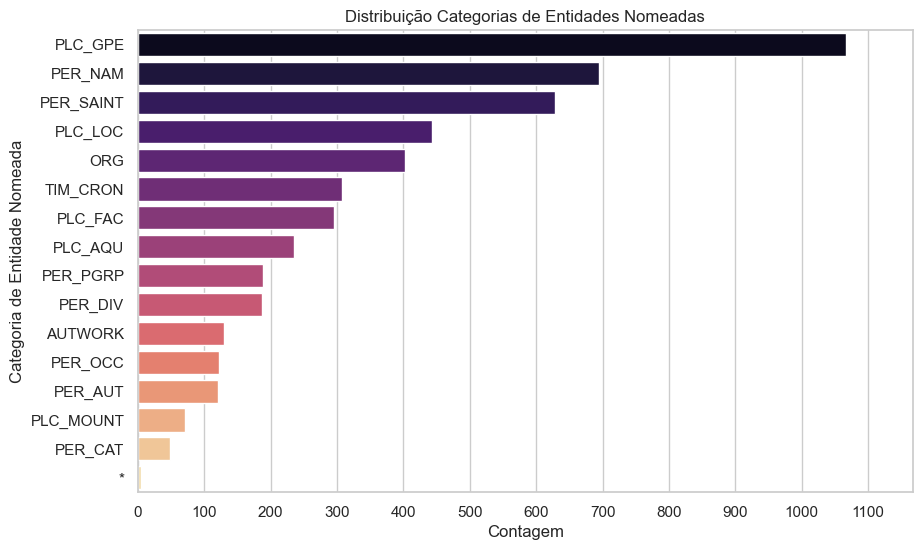

In [21]:
# Distribution of the categories of named entities among all freguesias
top_categories = df['category_entity'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, orient='h', palette='magma')
plt.title('Distribuição Categorias de Entidades Nomeadas')
plt.xlabel('Contagem')
intervalo_x_ticks = np.arange(0, top_categories.max() + 100, 100)  # Intervalo de 10 em 10
plt.xticks(intervalo_x_ticks)
plt.xlim(0, top_categories.max() + 100)
plt.ylabel('Categoria de Entidade Nomeada')
file_name = f'exported_figures/figure_distribuicao_categorias_de_entidades_nomeadas.png'
plt.savefig(file_name)
# plt.close()  # Close the figure
plt.show()

## Frequência das Categorias de entidades nomeadas por Cidade
- Considerando: [Beja, Evora, Vila Viçosa]

In [22]:
# Distribution of the main (top 15) entities nominated among all freguesias
frequencia_categoria_entidades = df.groupby(['city', 'category_entity']).size().unstack(fill_value=0)

def plot_category_city(city):
    all_frequencia_categoria_entidades = frequencia_categoria_entidades.loc[city]
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=all_frequencia_categoria_entidades.values, y=all_frequencia_categoria_entidades.index, orient='h', palette='magma')
    ax.set(xlabel='Frequência', ylabel='Categoria de Entidades', title=f'Distribuição de Categorias de Entidades em {city}')
    intervalo_x_ticks = np.arange(0, frequencia_categoria_entidades.max().max() + 10, 50)  # Intervalo de 10 em 10
    plt.xticks(intervalo_x_ticks)
    plt.xlim(0, frequencia_categoria_entidades.max().max() + 10)
    file_name = f'exported_figures/figure_distribuicao_categorias_de_entidades_{city}.png'
    plt.savefig(file_name)
    # plt.close()  # Close the figure
    plt.show()
    
interact(plot_category_city, city=cities)

interactive(children=(Dropdown(description='city', options=('Beja', 'Evora', 'Portalegre', 'VilaVicosa'), valu…

<function __main__.plot_category_city(city)>

## Frequência das top N entidades nomeadas por Cidade
- Considerando: [Beja, Evora, Vila Viçosa]

In [23]:
frequencia_entidades = df.groupby(['city', 'ent_concat']).size().unstack(fill_value=0)

def plot_city(city):
    top_15_entidades = frequencia_entidades.loc[city].nlargest(15)
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=top_15_entidades.values, y=top_15_entidades.index, orient='h', palette='magma')
    intervalo_x_ticks = np.arange(0, frequencia_entidades.max().max() + 10, 10)  # Intervalo de 10 em 10
    plt.xticks(intervalo_x_ticks)
    plt.xlim(0, frequencia_entidades.max().max() + 10)
    ax.set(xlabel='Frequência', ylabel='Entidades', title=f'Top 15 Entidades em {city}')
    file_name = f'exported_figures/figure_top_15_entidades_nomeadas_{city}.png'
    plt.savefig(file_name)
    # plt.close()  # Close the figure
    plt.show()
    
interact(plot_city, city=cities)

interactive(children=(Dropdown(description='city', options=('Beja', 'Evora', 'Portalegre', 'VilaVicosa'), valu…

<function __main__.plot_city(city)>

## Clusterização das Entidades
- Tentar identificar entidades similares usando PCA

### 2D Clustering usando algoritmo PCA

#### Executando PCA

In [24]:
# Step 1: Vectorize the words into vectors
entities = np.unique(df['ent_concat'].tolist())
print(len(entities))
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(entities)

# Step 2: Use K-Means to cluster the vectors into 'k' clusters
num_clusters = 5  # You can choose the number of clusters (k) as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Step 3: Run PCA to reduce vectors to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

# Step 4: Plot the words and color by cluster
df2 = pd.DataFrame({'Word': entities, 'Cluster': kmeans.labels_, 'X': pca_result[:, 0], 'Y': pca_result[:, 1]})

# Define a color map for clusters
colors = sns.color_palette("husl", num_clusters)

2756


#### Plotting a 2D clusterização

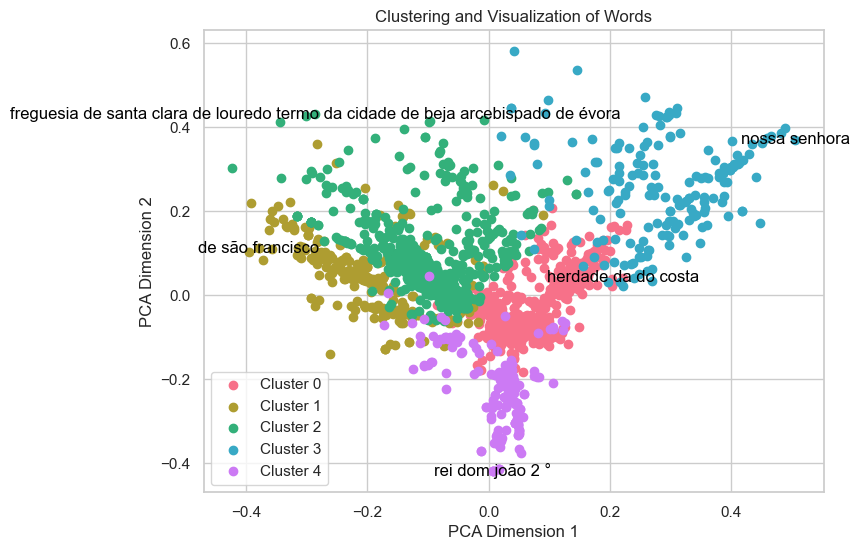

In [25]:
# Plot the words with different colors for each cluster
plt.figure(figsize=(8, 6))
for cluster in range(num_clusters):
    cluster_data = df2[df2['Cluster'] == cluster]
    plt.scatter(cluster_data['X'], 
                cluster_data['Y'], 
                color=colors[cluster], 
                label=f'Cluster {cluster}'
               )

# Step 5: Annotate only the central words of each cluster
central_words, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, tfidf_matrix)
for word_idx in central_words:
    plt.annotate(entities[word_idx], 
                 (pca_result[word_idx, 0], pca_result[word_idx, 1]), 
                 fontsize=12, 
                 color='black', 
                 ha='center', 
                 va='center')

#for i, txt in enumerate(df2['Word']):
#    if i not in central_words:
#        plt.annotate(txt, (df2['X'][i], df2['Y'][i]), fontsize=8, ha='center', va='center')

plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title('Clustering and Visualization of Words')
plt.legend(loc='best')
file_name = f'exported_figures/figure_2d_clustering_and_visualization_of_words.png'
plt.savefig(file_name)
# plt.close()  # Close the figure
plt.show()

### 3D Clustering usando algoritmo PCA

In [26]:
# Step 3: Run PCA to reduce vectors to 3 dimensions
pca = PCA(n_components=3)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

# Step 4: Plot the words and color by cluster
df3 = pd.DataFrame({'Word': entities, 'Cluster': kmeans.labels_, 'X': pca_result[:, 0], 'Y': pca_result[:, 1], 'Z': pca_result[:, 2]})

#### Plotting a 3D clusterização

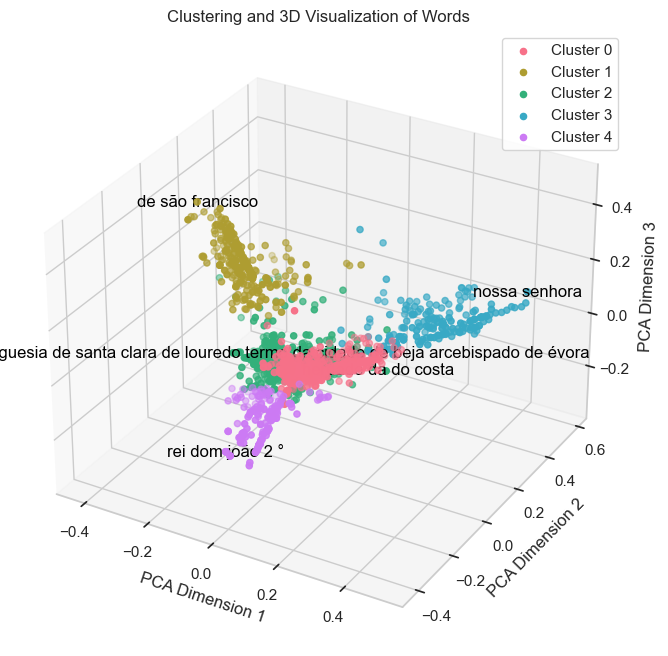

In [27]:
# Plot the words with different colors for each cluster in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster in range(num_clusters):
    cluster_data = df3[df3['Cluster'] == cluster]
    ax.scatter(cluster_data['X'], cluster_data['Y'], cluster_data['Z'], color=colors[cluster], label=f'Cluster {cluster}')

# Step 5: Annotate only the central words of each cluster in 3D
central_words, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, tfidf_matrix)
for word_idx in central_words:
    ax.text(pca_result[word_idx, 0], pca_result[word_idx, 1], pca_result[word_idx, 2], entities[word_idx], fontsize=12, color='black', ha='center', va='center')

ax.set_xlabel('PCA Dimension 1')
ax.set_ylabel('PCA Dimension 2')
ax.set_zlabel('PCA Dimension 3')
ax.set_title('Clustering and 3D Visualization of Words')
plt.legend(loc='best')
file_name = f'exported_figures/figure_3d_clustering_and_visualization_of_words.png'
plt.savefig(file_name)
# plt.close()  # Close the figure
plt.show()

#### Interactive Plotting a 3D clusterização 

<IPython.core.display.Javascript object>


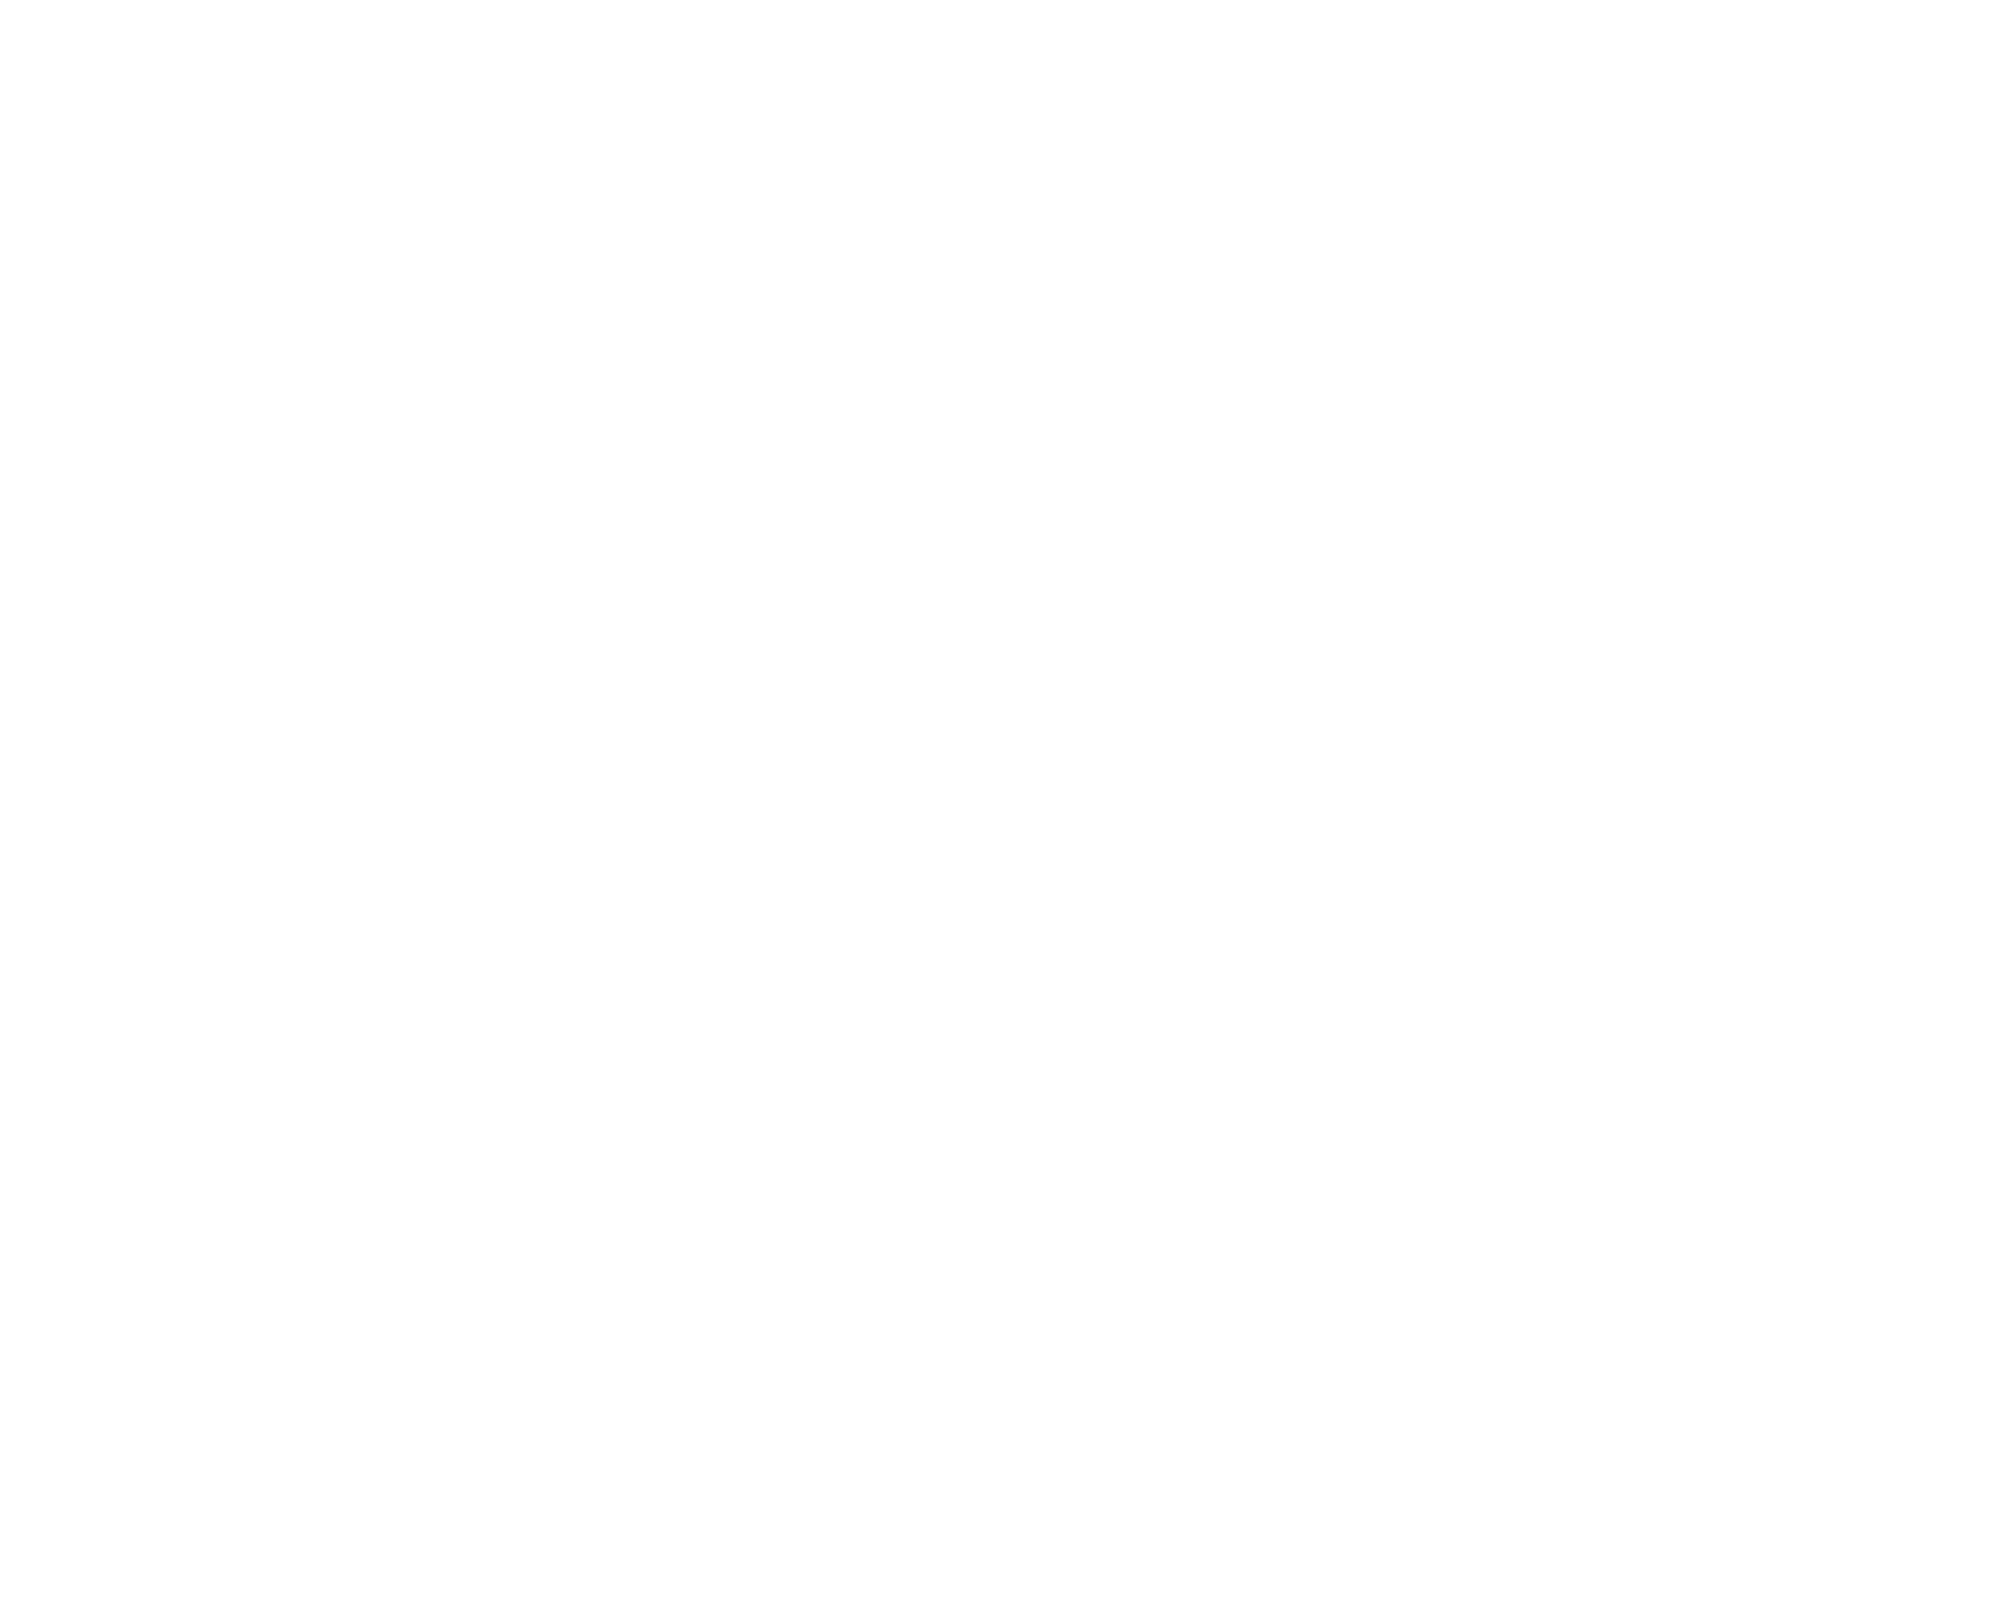

In [28]:
# Activate interactive mode for rotation
%matplotlib notebook

# Step 4: Define Seaborn style and color palette
sns.set(style='whitegrid')
sns.set_palette('husl', n_colors=num_clusters)

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the words and color by cluster in 3D
for cluster in range(num_clusters):
    cluster_data = df3[df3['Cluster'] == cluster]
    ax.scatter(cluster_data['X'], cluster_data['Y'], cluster_data['Z'], label=f'Cluster {cluster}')

# Step 5: Annotate only the central words of each cluster in 3D
central_words, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, tfidf_matrix)
for word_idx in central_words:
    ax.text(pca_result[word_idx, 0], pca_result[word_idx, 1], pca_result[word_idx, 2], entities[word_idx], fontsize=12, color='black', ha='center', va='center')

ax.set_xlabel('PCA Dimension 1')
ax.set_ylabel('PCA Dimension 2')
ax.set_zlabel('PCA Dimension 3')
ax.set_title('Clustering and 3D Visualization of Words')
plt.legend(loc='best')
file_name = f'exported_figures/figure_3d_interactive_clustering_and_visualization_of_words.png'
plt.savefig(file_name)
# plt.close()  # Close the figure
plt.show()

### Unindo dados de anotação com Clustering

In [29]:
df_to_report = pd.merge(df, df3, left_on = 'ent_concat', right_on = 'Word', how = 'left')
df_to_report = df_to_report.drop(['X', 'Y', 'Z', 'Word'], axis=1)
df_to_report

,file_name,category_entity,ent_concat,text_concat,city,freguesia,Cluster
0,Beja_Albernoa.modernizada,PLC_LOC,albernoa,"#Text=Albernoa, 1758\r#Text=Memória Paroquial ...",Beja,Albernoa,0
1,Beja_Albernoa.modernizada,PLC_AQU,louriçais,"#Text=O vasto, e inculto terreno desta paróqui...",Beja,Albernoa,0
2,Beja_Albernoa.modernizada,PLC_AQU,cobres,"#Text=O vasto, e inculto terreno desta paróqui...",Beja,Albernoa,0
3,Beja_Albernoa.modernizada,PLC_AQU,terges,"#Text=O vasto, e inculto terreno desta paróqui...",Beja,Albernoa,0
4,Beja_Albernoa.modernizada,PLC_LOC,albernoa é aldeia do termo da cidade = beja,"#Text=Albernoa, 1758\r#Text=Memória Paroquial ...",Beja,Albernoa,2
...,...,...,...,...,...,...,...
4942,VilaVicosa_SaoRomao.revista.normalizada,PLC_GPE,vila viçosa,"#Text=O seu templo é só de uma nave, e está si...",VilaVicosa,SaoRomao.normalizada,2
4943,VilaVicosa_SaoRomao.revista.normalizada,PLC_GPE,vila viçosa,"#Text=Tem duas pontes de pedra, e cal, uma des...",VilaVicosa,SaoRomao.normalizada,2
4944,VilaVicosa_SaoRomao.revista.normalizada,PER_NAM,cura p . alberto mendes catela,#Text=E não acho mais de que dar a conta a Vos...,VilaVicosa,SaoRomao.normalizada,0
4945,VilaVicosa_SaoRomao.revista.normalizada,PLC_GPE,são romão,#Text=Contém em si esta freguesia duas aldeias...,VilaVicosa,SaoRomao.normalizada,1


#### Entidades por cluster by PCA [Geral]

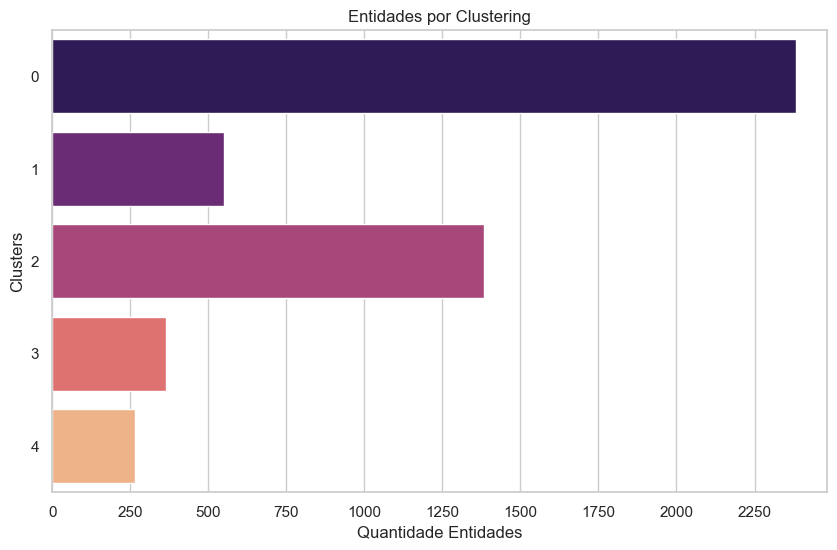

In [30]:
%matplotlib inline

words_by_cluster = df_to_report['Cluster'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=words_by_cluster.values, y=words_by_cluster.index, orient='h', palette='magma')
plt.title('Entidades por Clustering')
plt.xlabel('Quantidade Entidades')
intervalo_x_ticks = np.arange(0, words_by_cluster.max() + 100, 250)  # Intervalo de 10 em 10
plt.xticks(intervalo_x_ticks)
plt.xlim(0, words_by_cluster.max() + 100)
plt.ylabel('Clusters')
file_name = f'exported_figures/figure_distribuicao_entidades_por_cluster.png'
plt.savefig(file_name)
# plt.close()  # Close the figure
plt.show()

#### Entidades por cluster by PCA [por Cidade]
- Considerando: [Beja, Evora, Vila Viçosa]

In [31]:
# Distribution of entities by clusters
words_by_cluster_city = df_to_report.groupby(['city', 'Cluster']).size().unstack(fill_value=0)

In [32]:

def plot_cluster_city(city):
    all_words_by_cluster_city = words_by_cluster_city.loc[city]
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=all_words_by_cluster_city.values, y=all_words_by_cluster_city.index, orient='h', palette='magma')
    ax.set(xlabel='Quantidade de Entidades', ylabel='Clusters', title=f'Distribuição de Entidades por Cluster em {city}')
    intervalo_x_ticks = np.arange(0, words_by_cluster_city.max().max() + 100, 100)  # Intervalo de 10 em 10
    plt.xticks(intervalo_x_ticks)
    plt.xlim(0, words_by_cluster_city.max().max() + 100)
    file_name = f'exported_figures/figure_distribuicao_entidades_por_cluster_{city}.png'
    plt.savefig(file_name)
    # plt.close()  # Close the figure
    plt.show()
    
interact(plot_cluster_city, city=cities)

interactive(children=(Dropdown(description='city', options=('Beja', 'Evora', 'Portalegre', 'VilaVicosa'), valu…

<function __main__.plot_cluster_city(city)>